<a href="https://colab.research.google.com/github/beabosss/Microbe-Lab/blob/main/Microbe_Lab_Bea.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MICROBE Lab (Bea)

In [2]:
pip install Scipy

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
df = pd.read_csv("growth_rate_T.csv")
df.head()

,Time (h),Sample 1,Sample 2,Sample 3
0,0.00,0.085,0.083,0.095
1,1.11,0.097,0.095,0.099
2,2.11,0.116,0.114,0.119
3,3.15,0.144,0.140,0.149
4,4.05,0.167,0.162,0.171


Plot of OD vs time (h)

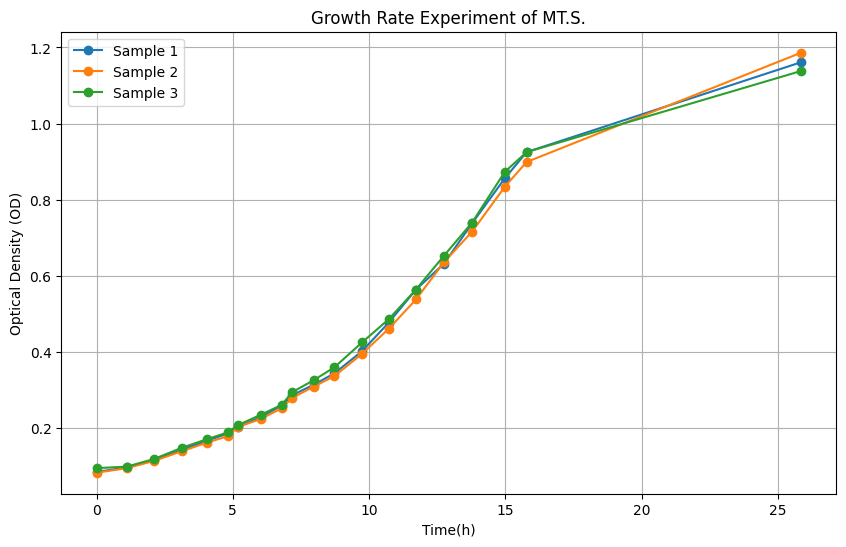

In [5]:
plt.figure(figsize=(10,6))
plt.plot(df['Time (h)'], df['Sample 1'], marker='o', label= 'Sample 1')
plt.plot(df['Time (h)'], df['Sample 2'], marker='o', label= 'Sample 2')
plt.plot(df['Time (h)'], df['Sample 3'], marker='o', label= 'Sample 3')
plt.xlabel('Time(h)')
plt.ylabel('Optical Density (OD)')
plt.title('Growth Rate Experiment of MT.S.')
plt.legend()
plt.grid(True)
plt.show()

Find growth rate: identify growth phases


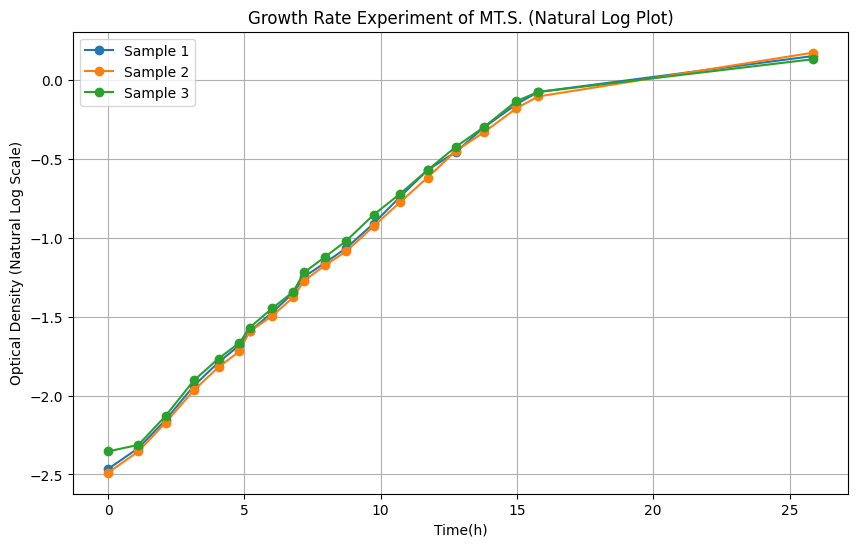

In [17]:
plt.figure(figsize=(10,6))
plt.plot(df['Time (h)'], np.log(df['Sample 1']), marker='o', label= 'Sample 1')
plt.plot(df['Time (h)'], np.log(df['Sample 2']), marker='o', label= 'Sample 2')
plt.plot(df['Time (h)'], np.log(df['Sample 3']), marker='o', label= 'Sample 3')
plt.xlabel('Time(h)')
plt.ylabel('Optical Density (Natural Log Scale)')
plt.title('Growth Rate Experiment of MT.S. (Natural Log Plot)')
plt.legend()
plt.grid(True, which="both", ls="-")
plt.show()

Only select part of the graph where Semi-log Plot is linear: t=5h to t=12h


Perform a linear regression to compute the specific growth rate

In [18]:
df_exponential = df[(df['Time (h)']>=5)&(df['Time (h)']<=12)]
display(df_exponential)

,Time (h),Sample 1,Sample 2,Sample 3
6,5.19,0.203,0.203,0.208
7,6.02,0.229,0.224,0.235
8,6.79,0.259,0.252,0.261
9,7.19,0.287,0.280,0.295
10,7.97,0.314,0.309,0.326
11,8.73,0.344,0.337,0.360
12,9.74,0.402,0.395,0.425
13,10.72,0.477,0.461,0.486
14,11.72,0.564,0.538,0.564


_specific_growth_rates = {}_, initializes an empty dictionary named specific_growth_rates. This dictionary will be used to store the calculated specific growth rate for each sample. The keys of the dictionary will be the sample names (e.g., 'Sample 1', 'Sample 2', 'Sample 3'), and the corresponding values will be the calculated specific growth rates.

In [19]:
from scipy.stats import linregress

specific_growth_rates = {}

for sample in ['Sample 1', 'Sample 2', 'Sample 3']:
  #Calculate the natural logarithm of the growth rate data
  log_growth_rate = np.log(df_exponential[sample])

  #Perform a linear regression
  slope, intercept, r_value, p_value, std_err = linregress(df_exponential['Time (h)'],log_growth_rate)

  #The slope is the specific growth rate
  specific_growth_rates[sample]=slope

  #Print calculated specific growth rates
  print(f"Specific growth rate for {sample}: {specific_growth_rates[sample]:.4f} h⁻¹")
  print(f"std_err: {std_err}")
  print(f"r_value: {r_value}")
  print(f"p_value: {p_value}")


Specific growth rate for Sample 1: 0.1542 h⁻¹
std_err: 0.0030153843786477432
r_value: 0.9986636990273525
p_value: 2.86838656268066e-10
Specific growth rate for Sample 2: 0.1498 h⁻¹
std_err: 0.0027177109339636724
r_value: 0.9988494564778794
p_value: 1.6990721898951005e-10
Specific growth rate for Sample 3: 0.1535 h⁻¹
std_err: 0.003135428845196996
r_value: 0.9985420002228393
p_value: 3.891099840803115e-10


In [26]:
# Create a DataFrame from the specific growth rates dictionary
growth_rate_table = pd.DataFrame.from_dict(specific_growth_rates, orient='index', columns=['Specific Growth Rate (h⁻¹)'])

# Add std_err and r_value to the table
# Assuming std_err and r_value are calculated and available in the loop in cell 1Qd-_QZCQcdG
# We need to store them in a dictionary similar to specific_growth_rates
std_err_dict = {}
r_value_dict = {}

from scipy.stats import linregress

for sample in ['Sample 1', 'Sample 2', 'Sample 3']:
  log_growth_rate = np.log(df_exponential[sample])
  slope, intercept, r_value, p_value, std_err = linregress(df_exponential['Time (h)'],log_growth_rate)
  std_err_dict[sample] = std_err
  r_value_dict[sample] = r_value

growth_rate_table['Standard Error'] = pd.Series(std_err_dict)
growth_rate_table['R-value'] = pd.Series(r_value_dict)


# Display the table
display(growth_rate_table)

,Specific Growth Rate (h⁻¹),Standard Error,R-value
Sample 1,0.154166,0.003015,0.998664
Sample 2,0.149765,0.002718,0.998849
Sample 3,0.153454,0.003135,0.998542


from matplotlib import pyplot as plt
_df_16['Specific Growth Rate (h⁻¹)'].plot(kind='hist', bins=20, title='Specific Growth Rate (h⁻¹)')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_17['Standard Error'].plot(kind='hist', bins=20, title='Standard Error')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_18['R-value'].plot(kind='hist', bins=20, title='R-value')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_19.groupby('index').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_20.plot(kind='scatter', x='Specific Growth Rate (h⁻¹)', y='Standard Error', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_21.plot(kind='scatter', x='Standard Error', y='R-value', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_22['Specific Growth Rate (h⁻¹)'].plot(kind='line', figsize=(8, 4), title='Specific Growth Rate (h⁻¹)')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_23['Standard Error'].plot(kind='line', figsize=(8, 4), title='Standard Error')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_24['R-value'].plot(kind='line', figsize=(8, 4), title='R-value')
plt.gca().spines[['top', 'right']].set_visible(False)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_25['index'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_25, x='Specific Growth Rate (h⁻¹)', y='index', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_26['index'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_26, x='Standard Error', y='index', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_27['index'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_27, x='R-value', y='index', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

Nitrogen source test

In [21]:
df = pd.read_csv("N_source.csv")
df.head()

,Date,10-Oct,15-Oct,17-Oct
0,GLY1,0.019,0.009,0.014
1,GLY2,0.018,0.014,0.028
2,GLY3,0.015,0.016,0.027
3,ALA1,0.019,0.093,0.075
4,ALA2,0.018,0.100,0.081


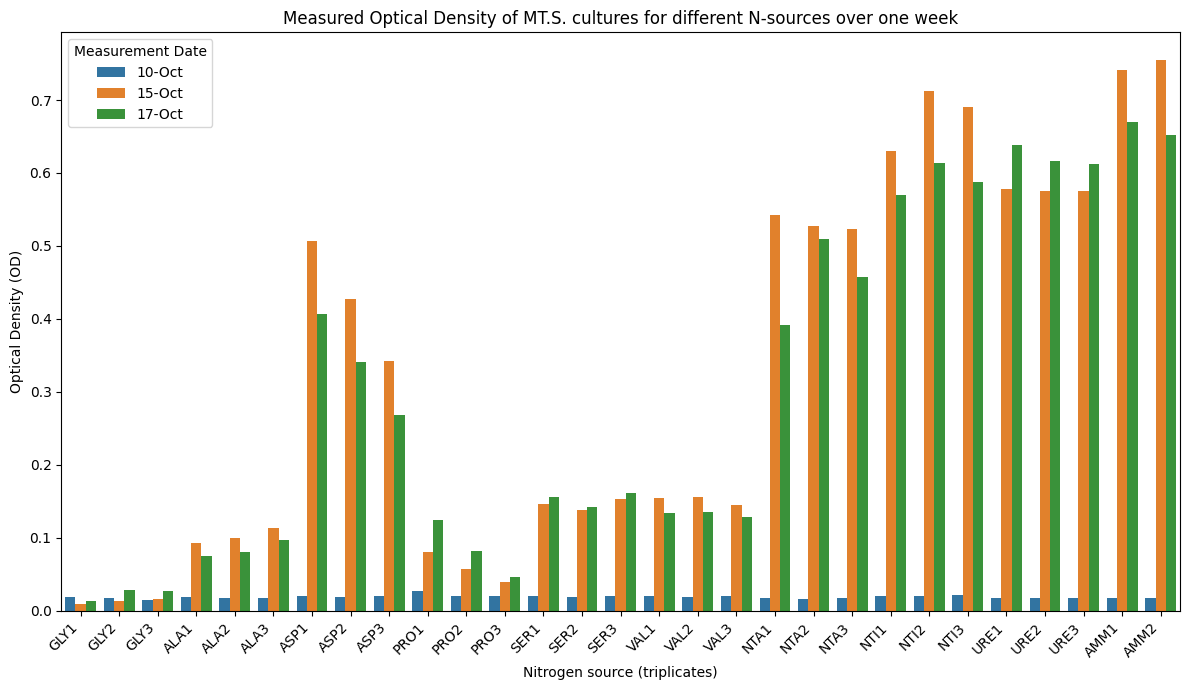

In [24]:
# Melt the DataFrame to long format for easier plotting
df_melted = df.melt(id_vars='Date', var_name='Measurement Date', value_name='Value')

plt.figure(figsize=(12, 7))
import seaborn as sns
sns.barplot(x='Date', y='Value', hue='Measurement Date', data=df_melted)
plt.xlabel('Nitrogen source (triplicates)')
plt.ylabel('Optical Density (OD)')
plt.title('Measured Optical Density of MT.S. cultures for different N-sources over one week')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()